# VGG16net

*170616 Masahiro Rikiso*

---

In [2]:
from __future__ import print_function, division
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget --no-check-certificate -O gorilla.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Male_silverback_Gorilla.JPG/236px-Male_silverback_Gorilla.JPG

--2017-06-16 18:18:24--  https://upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Male_silverback_Gorilla.JPG/236px-Male_silverback_Gorilla.JPG
Resolving upload.wikimedia.org... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23919 (23K) [image/jpeg]
Saving to: ‘gorilla.jpg’

gorilla.jpg         100%[===================>]  23.36K  --.-KB/s    in 0.1s    

2017-06-16 18:18:25 (210 KB/s) - ‘gorilla.jpg’ saved [23919/23919]



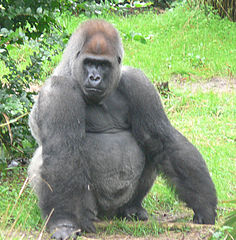

In [5]:
from IPython.display import Image
Image("gorilla.jpg")

In [6]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet')

img_path = 'gorilla.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

_pred = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
pred = decode_predictions(_pred, top=3)[0]
print('Predicted:')
print(pred[0])
print(pred[1])
print(pred[2])

####################################
# visualize model
####################################
from keras.utils import plot_model
plot_model(model, to_file="model/model_vgg16.png", show_shapes=True, show_layer_names=True)


Predicted:
(u'n02480855', u'gorilla', 0.99992514)
(u'n02481823', u'chimpanzee', 5.4582026e-05)
(u'n02480495', u'orangutan', 7.1418322e-06)


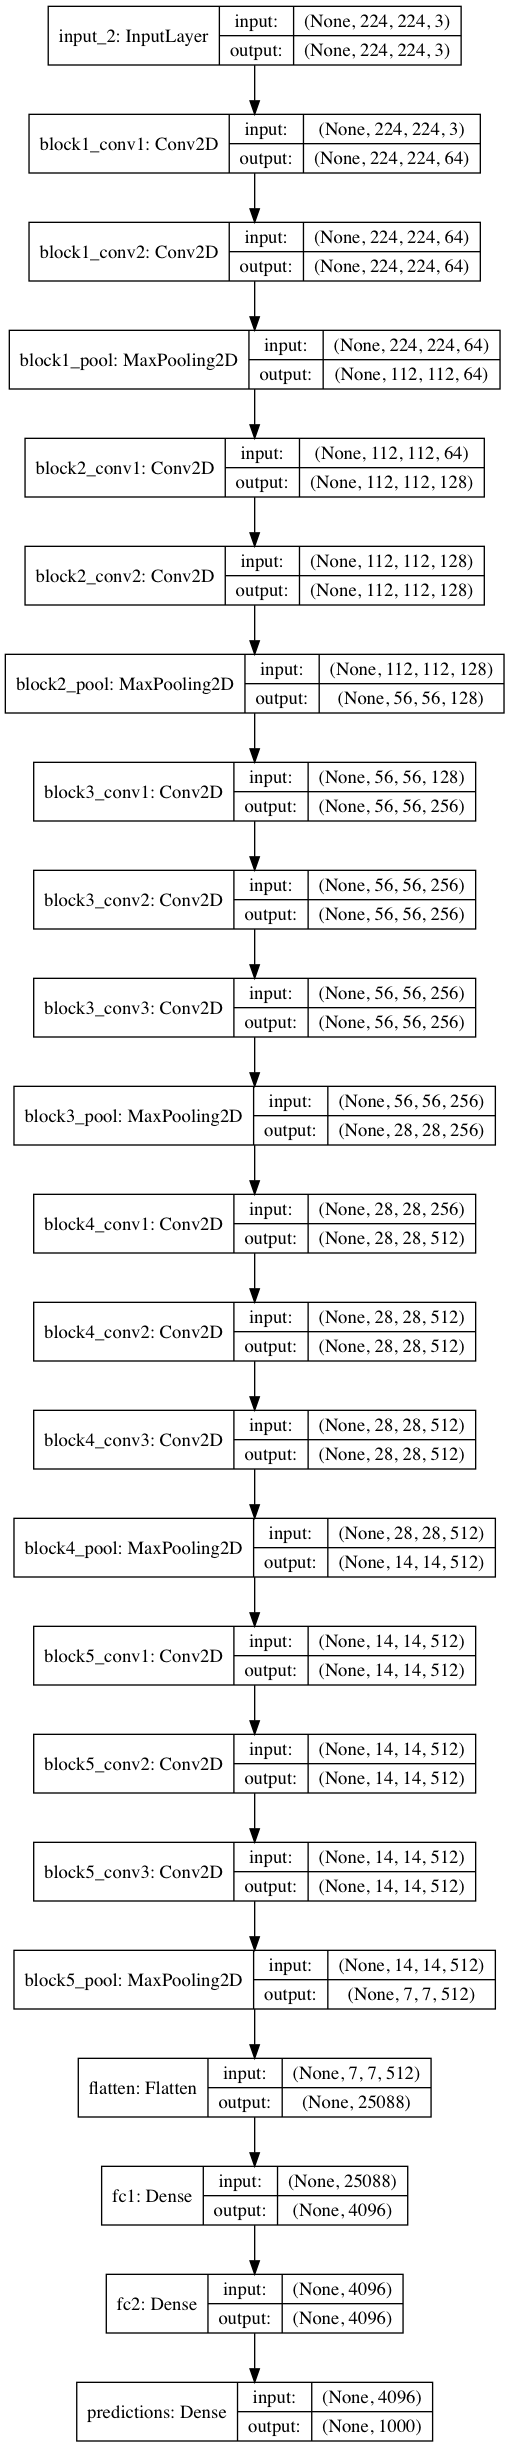

In [10]:
from IPython.display import Image
Image("model/model_vgg16.png", width=300)